In [1]:
import pickle
import os
from tqdm import tqdm

In [2]:
# cfg_path = "./mfcc_13dim/"
# map_dict = pickle.load(open("../speech2text/mfcc_13dim/bpe_map.dict", "rb"))
# vocab_dict = pickle.load(open("../speech2text/mfcc_13dim/bpe_train_vocab.dict", "rb"))

In [3]:
# read switchboard data

In [4]:
swbd1 = ["swbd1_train_100k", "swbd1_train_nodev", "swbd1_train_dev"]

In [ ]:
oov = {}
for c in swbd1:
    oov[c] = []
    print(c)
    map_dict[c] = {}
    
    with open(os.path.join("../subword-nmt/", "{0:s}.BPE_1000.en".format(c)), "rb") as text_f, \
         open(os.path.join("../subword-nmt/", "{0:s}.ids".format(c)), "r") as id_f, \
         open(os.path.join("../subword-nmt/", "{0:s}.clean.en".format(c)), "rb") as words_f:
        for i, t, e in zip(id_f, text_f, words_f):
            map_dict[c][i.strip()] = {}
            map_dict[c][i.strip()]["bpe_w"] = t.strip().split()
            map_dict[c][i.strip()]["en_w"] = e.strip().split()
            for w in t.strip().split():
                if w not in vocab_dict["bpe_w"]["w2i"]:
                    oov[c].append(w)
    # end with

In [ ]:
map_dict['swbd1_train_dev']['sw02001-A_000098-001156']

In [ ]:
for u in list(map_dict["fisher_train"].keys())[:5]:
    print(map_dict["fisher_train"][u]["en_w"])
    print(map_dict["fisher_train"][u]["bpe_w"])
    print("-")

In [ ]:
pickle.dump(map_dict, open("{0:s}/fisher_swbd1_map.dict".format(cfg_path), "wb"))
pickle.dump(vocab_dict, open("{0:s}/fisher_swbd1_train_vocab.dict".format(cfg_path), "wb"))

### prep speech segments

In [5]:
cfg_path = "./mfcc_13dim/"
map_dict = pickle.load(open("../speech2text/mfcc_13dim/fisher_swbd1_map.dict", "rb"))
vocab_dict = pickle.load(open("../speech2text/mfcc_13dim/fisher_swbd1_train_vocab.dict", "rb"))

In [6]:
base_mfcc = "./mfcc_13dim/swbd1_mfcc/"

In [7]:
import numpy as np
import cupy as cp
from tqdm import tqdm
from chainer import cuda, Function, report, training, utils, Variable

In [11]:
swbd1_folders = {"swbd1_train_nodev", "swbd1_train_100k", "swbd1_train_dev"}
swbd1_data = {}
for c in swbd1_folders:
    for x in tqdm(os.listdir(os.path.join(base_mfcc, c))):
        temp = np.load(os.path.join(base_mfcc, c, x))
        for k in temp:
            swbd1_data[k] = temp[k]
        # end for
    # end for
# end for

100%|██████████| 34/34 [00:00<00:00, 188.63it/s]


In [13]:
info_20 = pickle.load(open("../speech2text/mfcc_13dim/info.dict", "rb"))

In [14]:
info_20["fisher_dev"]

{'20051009_182032_217_fsp-B-1': {'en_c': 9,
  'en_w': 1,
  'es_c': 6,
  'es_w': 1,
  'sp': 78},
 '20051009_182032_217_fsp-A-1': {'en_c': 14,
  'en_w': 2,
  'es_c': 13,
  'es_w': 2,
  'sp': 120},
 '20051009_182032_217_fsp-B-2': {'en_c': 38,
  'en_w': 8,
  'es_c': 35,
  'es_w': 8,
  'sp': 241},
 '20051009_182032_217_fsp-A-2': {'en_c': 21,
  'en_w': 5,
  'es_c': 23,
  'es_w': 5,
  'sp': 155},
 '20051009_182032_217_fsp-B-3': {'en_c': 4,
  'en_w': 1,
  'es_c': 2,
  'es_w': 1,
  'sp': 48},
 '20051009_182032_217_fsp-A-3': {'en_c': 26,
  'en_w': 6,
  'es_c': 27,
  'es_w': 5,
  'sp': 341},
 '20051009_182032_217_fsp-B-4': {'en_c': 19,
  'en_w': 3,
  'es_c': 18,
  'es_w': 3,
  'sp': 190},
 '20051009_182032_217_fsp-A-4': {'en_c': 21,
  'en_w': 5,
  'es_c': 20,
  'es_w': 4,
  'sp': 154},
 '20051009_182032_217_fsp-B-5': {'en_c': 22,
  'en_w': 5,
  'es_c': 24,
  'es_w': 6,
  'sp': 200},
 '20051009_182032_217_fsp-A-5': {'en_c': 76,
  'en_w': 18,
  'es_c': 92,
  'es_w': 18,
  'sp': 491},
 '20051009_182

In [43]:
list(swbd1_data.keys())[:5]

['sw02513-A_001918-002083',
 'sw02513-A_002186-002586',
 'sw02513-A_007973-008098',
 'sw02513-A_009795-009931',
 'sw02513-A_010755-010896']

In [66]:
np.std(swbd1_data['sw02001-A_000098-001156'])

0.9856408

In [45]:
map_dict["swbd1_train_dev"]['sw02001-A_000098-001156']

{'bpe_w': [b'hi',
  b'um',
  b'yeah',
  b"i'@@",
  b'd',
  b'like',
  b'to',
  b'talk',
  b'about',
  b'how',
  b'you',
  b'dre@@',
  b'ss',
  b'for',
  b'work',
  b'and',
  b'and',
  b'um',
  b'what',
  b'do',
  b'you',
  b'nor@@',
  b'm@@',
  b'ally',
  b'what',
  b'ty@@',
  b'pe',
  b'of',
  b'ou@@',
  b't@@',
  b'f@@',
  b'it',
  b'do',
  b'you',
  b'nor@@',
  b'm@@',
  b'ally',
  b'have',
  b'to',
  b'w@@',
  b'ear'],
 'en_w': [b'hi',
  b'um',
  b'yeah',
  b"i'd",
  b'like',
  b'to',
  b'talk',
  b'about',
  b'how',
  b'you',
  b'dress',
  b'for',
  b'work',
  b'and',
  b'and',
  b'um',
  b'what',
  b'do',
  b'you',
  b'normally',
  b'what',
  b'type',
  b'of',
  b'outfit',
  b'do',
  b'you',
  b'normally',
  b'have',
  b'to',
  b'wear']}

In [25]:
" ".join([w.decode() for w in map_dict["swbd1_train_dev"]['sw02001-A_000098-001156']["en_w"]])

"hi um yeah i'd like to talk about how you dress for work and and um what do you normally what type of outfit do you normally have to wear"

In [26]:
len(" ".join([w.decode() for w in map_dict["swbd1_train_dev"]['sw02001-A_000098-001156']["en_w"]]))

137

In [17]:
# for c in set(swbd1_ids) - {"swbd1_train_nodev"}:
for c in set(swbd1_ids):    
    info_20[c] = {}
    for x in tqdm(swbd1_ids[c], ncols=80):
        info_20[c][x] = {}
        info_20[c][x]["sp"] = swbd1_data[x].shape[0]
        info_20[c][x]["es_w"] = 0
        info_20[c][x]["es_c"] = 0
        info_20[c][x]["en_w"] = len(map_dict[c][x]["en_w"])
        info_20[c][x]["en_c"] = len(" ".join([w.decode() for w in map_dict[c][x]["en_w"]]))
    # end for        

100%|███████████████████████████████████| 4000/4000 [00:00<00:00, 103712.23it/s]


In [18]:
info_20.keys()

dict_keys(['fisher_dev', 'fisher_dev2', 'fisher_test', 'fisher_train', 'swbd1_train_100k', 'swbd1_train_nodev', 'swbd1_train_dev'])

In [61]:
info_20["swbd1_train_dev"]

{'sw02001-A_000098-001156': {'en_c': 137,
  'en_w': 30,
  'es_c': 0,
  'es_w': 0,
  'sp': 1056},
 'sw02001-A_001980-002131': {'en_c': 5,
  'en_w': 1,
  'es_c': 0,
  'es_w': 0,
  'sp': 149},
 'sw02001-A_002736-002893': {'en_c': 6,
  'en_w': 2,
  'es_c': 0,
  'es_w': 0,
  'sp': 155},
 'sw02001-A_003390-004012': {'en_c': 94,
  'en_w': 22,
  'es_c': 0,
  'es_w': 0,
  'sp': 620},
 'sw02001-A_004012-004155': {'en_c': 5,
  'en_w': 1,
  'es_c': 0,
  'es_w': 0,
  'sp': 141},
 'sw02001-A_005013-005157': {'en_c': 5,
  'en_w': 1,
  'es_c': 0,
  'es_w': 0,
  'sp': 142},
 'sw02001-A_005696-006559': {'en_c': 129,
  'en_w': 27,
  'es_c': 0,
  'es_w': 0,
  'sp': 861},
 'sw02001-A_006960-007110': {'en_c': 5,
  'en_w': 1,
  'es_c': 0,
  'es_w': 0,
  'sp': 148},
 'sw02001-A_007332-007541': {'en_c': 3,
  'en_w': 1,
  'es_c': 0,
  'es_w': 0,
  'sp': 207},
 'sw02001-A_007642-008004': {'en_c': 38,
  'en_w': 9,
  'es_c': 0,
  'es_w': 0,
  'sp': 360},
 'sw02001-A_008143-009209': {'en_c': 146,
  'en_w': 33,
  'e

In [19]:
pickle.dump(info_20, open("./mfcc_13dim/info_160hrs_swbd1.dict", "wb"))

In [33]:
sp_durs = np.asarray([x["sp"] for x in info_20["swbd1_train_100k"].values()], dtype=np.int32)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

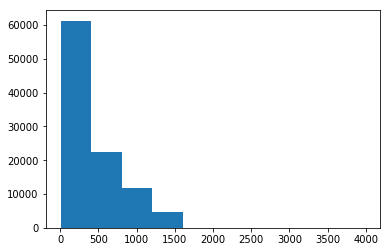

In [40]:
_ = plt.hist(sp_durs)

In [16]:
swbd1_ids = {"swbd1_train_100k": [], "swbd1_train_nodev": [], "swbd1_train_dev": []}

for c in swbd1_ids:
    with open(os.path.join("../subword-nmt/", "{0:s}.ids".format(c)), "r") as id_f:
        for i in id_f:
            swbd1_ids[c].append(i.strip())
        # end for
    # end with
# end for         

In [ ]:
pickle.dump(swbd1_ids, open("../speech2text/mfcc_13dim/swbd1_ids.dict", "wb"))

In [ ]:
len(set(swbd1_ids["swbd1_train_100k"]) & set(swbd1_ids["swbd1_train_nodev"]))

In [ ]:
speech_base = "/disk/scratch/s1444673/zero/installs/kaldi/egs/swbd/s5c/swbd1_mfcc/swbd1_train_dev"

In [ ]:
swbd1_data = 

In [8]:
ref_file = "../subword-nmt/swbd1_train_dev.clean.en"
ref_out_file = "../subword-nmt/swbd1_train_dev_wer.en"
hyp_file = "./asr_en/sp_100k/swbd1_train_dev_beam_min-0_max-300_N-3_K-3.en"
hyp_out_file = "./asr_en/sp_100k/swbd1_train_dev_beam_min-0_max-300_N-3_K-3_ids.en"

In [8]:
swbd1_ids = pickle.load(open("../speech2text/mfcc_13dim/swbd1_ids.dict", 
                                "rb"))

In [9]:
with open(ref_file, "r") as in_f, open(ref_out_file, "w") as out_f:
    for i, line in zip(swbd1_ids["swbd1_train_dev"], in_f):
        out_f.write("{0:s} ({1:s})\n".format(line.strip(), i))        

In [10]:
with open(hyp_file, "r") as in_f, open(hyp_out_file, "w") as out_f:
    for i, line in zip(swbd1_ids["swbd1_train_dev"], in_f):
        out_f.write("{0:s} ({1:s})\n".format(line.strip(), i))

In [9]:
swbd1_info = pickle.load(open("./mfcc_13dim/info_160hrs_swbd1.dict", "rb"))

In [31]:
swbd1_info.keys()

dict_keys(['fisher_dev', 'fisher_dev2', 'fisher_test', 'fisher_train', 'swbd1_train_100k', 'swbd1_train_nodev', 'swbd1_train_dev'])

In [32]:
swbd1_20k_info = {}

In [33]:
from copy import deepcopy
import random

In [34]:
swbd1_20k_info["swbd1_train_dev"] = deepcopy(swbd1_info["swbd1_train_dev"])

In [35]:
swbd1_20k_ids = random.sample(list(swbd1_info["swbd1_train_nodev"].keys()), 20000)

In [36]:
len(swbd1_20k_ids)

20000

In [37]:
swbd1_20k_info["swbd1_train_nodev"] = {}
for u in swbd1_20k_ids:
    swbd1_20k_info["swbd1_train_nodev"][u] = deepcopy(swbd1_info["swbd1_train_nodev"][u])
    # end for        

In [39]:
len(swbd1_20k_info["swbd1_train_nodev"])

20000

In [40]:
swbd1_20k_info.keys()

dict_keys(['swbd1_train_dev', 'swbd1_train_nodev'])

In [41]:
pickle.dump(swbd1_20k_info, open("./mfcc_13dim/info_swbd1_20k.dict", "wb"))

In [42]:
durs = []
for u in swbd1_20k_info["swbd1_train_nodev"]:
    durs.append(swbd1_20k_info["swbd1_train_nodev"][u]["sp"] 
                   if swbd1_20k_info["swbd1_train_nodev"][u]["sp"] <= 2000 else 2000)

print("{0:.2f}".format(sum(durs) / 100 / 3600))

23.89


### Vocab dict

In [ ]:
len(vocab_dict["en_w"]["w2i"])

In [ ]:
list(vocab_dict["en_w"]["w2i"].keys())[:5]

In [ ]:
START_VOCAB = [b'_PAD', b'_GO', b'_EOS', b'_UNK']
vocab_bpe = {"w2i":{}, "i2w":{}, "freq":{}}
for w in START_VOCAB:
    vocab_bpe['w2i'][w] = len(vocab_bpe["w2i"])
    vocab_bpe["freq"][w] = 1

In [ ]:
with open("../subword-nmt/vocab_1000.en", "rb") as in_f:
    for line in in_f:
        line_items = line.strip().split()
        w = line_items[0]
        f = int(line_items[1])
        vocab_bpe["w2i"][w] = len(vocab_bpe["w2i"])
        vocab_bpe["freq"][w] = f

In [ ]:
vocab_bpe["i2w"] = {val:key for key, val in vocab_bpe["w2i"].items()}

In [ ]:
len(vocab_bpe["w2i"])

In [ ]:
new_keys = set(vocab_bpe["w2i"].items())

In [ ]:
old_keys = set(bpe_1000['bpe_w']['w2i'].items())

In [ ]:
sorted(new_keys)

In [ ]:
len(new_keys), len(old_keys)

In [ ]:
for n,o in zip(sorted(new_keys), sorted(old_keys)):
    if n != o:
        print(n, o)

In [ ]:
new_keys == old_keys

In [ ]:
vocab_bpe["w2i"] == bpe_1000['bpe_w']['w2i']

In [ ]:
vocab_dict["bpe_w"] = vocab_bpe

In [ ]:
# pickle.dump(vocab_dict, open("fbanks_80dim_nltk/bpe{0:s}_train_vocab.dict".format(bpe_size_prefix), "wb"))

In [ ]:
swbd_words = []

In [ ]:
with open("../subword-nmt/swbd1_train_nodev.clean.en", "r", encoding="utf-8") as in_f:
    for line in in_f:
        swbd_words.extend(line.strip().split())
swbd_words = list(set(swbd_words))    

In [ ]:
len(swbd_words)

In [ ]:
fisher_vocab_words = list([w.decode() for w in bpe_1000['en_w']['w2i'].keys()])

In [ ]:
len(fisher_vocab_words)

In [ ]:
len(set(swbd_words) & set(fisher_vocab_words))

In [ ]:
[w.decode() for w in bpe_1000["bpe_w"]["w2i"].keys() if len(w) == 1]

In [ ]:
b"." in bpe_1000["bpe_w"]["w2i"]

In [ ]:
len(set(swbd_words) - set(fisher_vocab_words)), set(swbd_words) - set(fisher_vocab_words)

### Misc

In [ ]:
import re

In [ ]:
test_str = "ah look my fa@@ ther is cu@@ b@@ an"

test_str.replace("@@ ", '')

In [ ]:
Variable1

In [ ]:
with open("../subword-nmt/fisher_train.BPE.en", "r") as in_f, open("../subword-nmt/hehe.txt", "w") as out_f:
    for line in in_f:
        out_f.write(line.replace("@@ ", ''))

In [8]:
swbd1_info = pickle.load(open("./mfcc_13dim/info_160hrs_swbd1.dict", "rb"))

In [24]:
durs = {}
for k in swbd1:
    durs[k] = []
    for u in tqdm(swbd1_info[k]):
        durs[k].append(swbd1_info[k][u]["sp"] if swbd1_info[k][u]["sp"] <= 2000 else 2000)
    # end for

    print("{0:s} = {1:.2f}".format(k, sum(durs[k]) / 100 / 3600))

 26%|██▌       | 66777/259890 [00:00<00:00, 667614.65it/s]

swbd1_train_100k = 118.92


100%|██████████| 4000/4000 [00:00<00:00, 717649.76it/s]

swbd1_train_nodev = 311.88
swbd1_train_dev = 5.09


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
np.mean(durs["swbd1_train_nodev"]), np.std(durs["swbd1_train_nodev"]), np.std(durs["swbd1_train_nodev"])

(432.01197429681787, 347.25005163955973, 347.25005163955973)

(array([1.00693e+05, 5.64250e+04, 3.45330e+04, 2.49370e+04, 1.87180e+04,
        1.32390e+04, 8.83700e+03, 2.44000e+03, 2.60000e+01, 4.20000e+01]),
 array([   9. ,  208.1,  407.2,  606.3,  805.4, 1004.5, 1203.6, 1402.7,
        1601.8, 1800.9, 2000. ]),
 <a list of 10 Patch objects>)

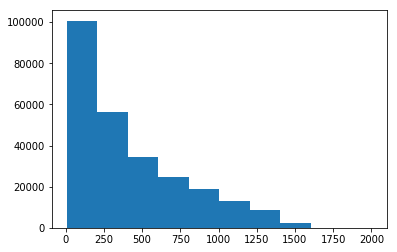

In [27]:
plt.hist(durs["swbd1_train_nodev"], bins=10)

In [30]:
260000 * 4.3 / 60 / 60

310.55555555555554